# Import

In [16]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

# 나눔고딕 폰트 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.unicode_minus'] = False

In [17]:
cd ~/Desktop/pogba_backup2/hey/K8_Ludasis/HJS/yolov5-face

/home/sysadm/Desktop/pogba_backup2/hey/K8_Ludasis/HJS/yolov5-face


## 파일 리스트 생성

In [27]:
with open("image_xy_label.txt", 'r') as f: #추론 결과 txt 파일 
    list_file = []
    for line in f:
        list_file.append(line)
list_file

['data/crop_image/211221_114331_114442_000.jpg,0.925,605,868,697,893,[608, 873, 641, 888, 695, 875, 661, 889, 653, 880]\n',
 'data/crop_image/211221_114331_114442_001.jpg,0.921,598,885,692,910,[602, 890, 634, 905, 689, 890, 656, 905, 647, 896]\n',
 'data/crop_image/211221_114331_114442_002.jpg,0.932,594,900,687,927,[596, 905, 628, 923, 683, 910, 650, 924, 641, 915]\n',
 'data/crop_image/211221_114331_114442_003.jpg,0.930,590,917,686,944,[592, 923, 627, 940, 683, 925, 648, 940, 640, 930]\n',
 'data/crop_image/211221_114331_114442_004.jpg,0.928,590,932,686,958,[592, 938, 625, 955, 683, 940, 647, 955, 638, 945]\n',
 'data/crop_image/211221_114331_114442_005.jpg,0.933,590,944,687,971,[592, 950, 627, 968, 686, 953, 650, 969, 641, 959]\n',
 'data/crop_image/211221_114331_114442_006.jpg,0.931,594,956,693,984,[596, 963, 631, 980, 690, 965, 654, 980, 645, 971]\n',
 'data/crop_image/211221_114331_114442_007.jpg,0.928,598,964,698,991,[602, 973, 638, 988, 695, 970, 660, 988, 650, 979]\n',
 'data/c

## 파일 이름 리스트 생성

In [28]:
file_list = os.listdir('data/crop_image')
file_list.sort()
file_list

['.ipynb_checkpoints',
 '211221_114331_114442_000.jpg',
 '211221_114331_114442_001.jpg',
 '211221_114331_114442_002.jpg',
 '211221_114331_114442_003.jpg',
 '211221_114331_114442_004.jpg',
 '211221_114331_114442_005.jpg',
 '211221_114331_114442_006.jpg',
 '211221_114331_114442_007.jpg',
 '211221_114331_114442_008.jpg',
 '211221_114331_114442_009.jpg',
 '211221_114331_114442_010.jpg',
 '211221_114331_114442_011.jpg',
 '211221_114331_114442_012.jpg',
 '211221_114331_114442_013.jpg',
 '211221_114331_114442_014.jpg',
 '211221_114331_114442_015.jpg',
 '211221_114331_114442_016.jpg',
 '211221_114331_114442_017.jpg',
 '211221_114331_114442_018.jpg',
 '211221_114331_114442_019.jpg',
 '211221_114331_114442_020.jpg',
 '211221_114331_114442_021.jpg',
 '211221_114331_114442_022.jpg',
 '211221_114331_114442_023.jpg',
 '211221_114331_114442_024.jpg',
 '211221_114331_114442_025.jpg',
 '211221_114331_114442_026.jpg',
 '211221_114331_114442_027.jpg',
 '211221_114331_114442_028.jpg',
 '211221_114331_1144

## 이미지 파일 width, Height 

In [25]:
a = cv2.imread('data/crop_image/211221_114331_114442_000.jpg')

print(a.shape)
w= a.shape[1]
h = a.shape[0]

(2560, 1440, 3)


## 중앙선, 이탈 범위 좌표 계산
##### 중앙선 - 파랑
##### 이탈 범위 - 빨강

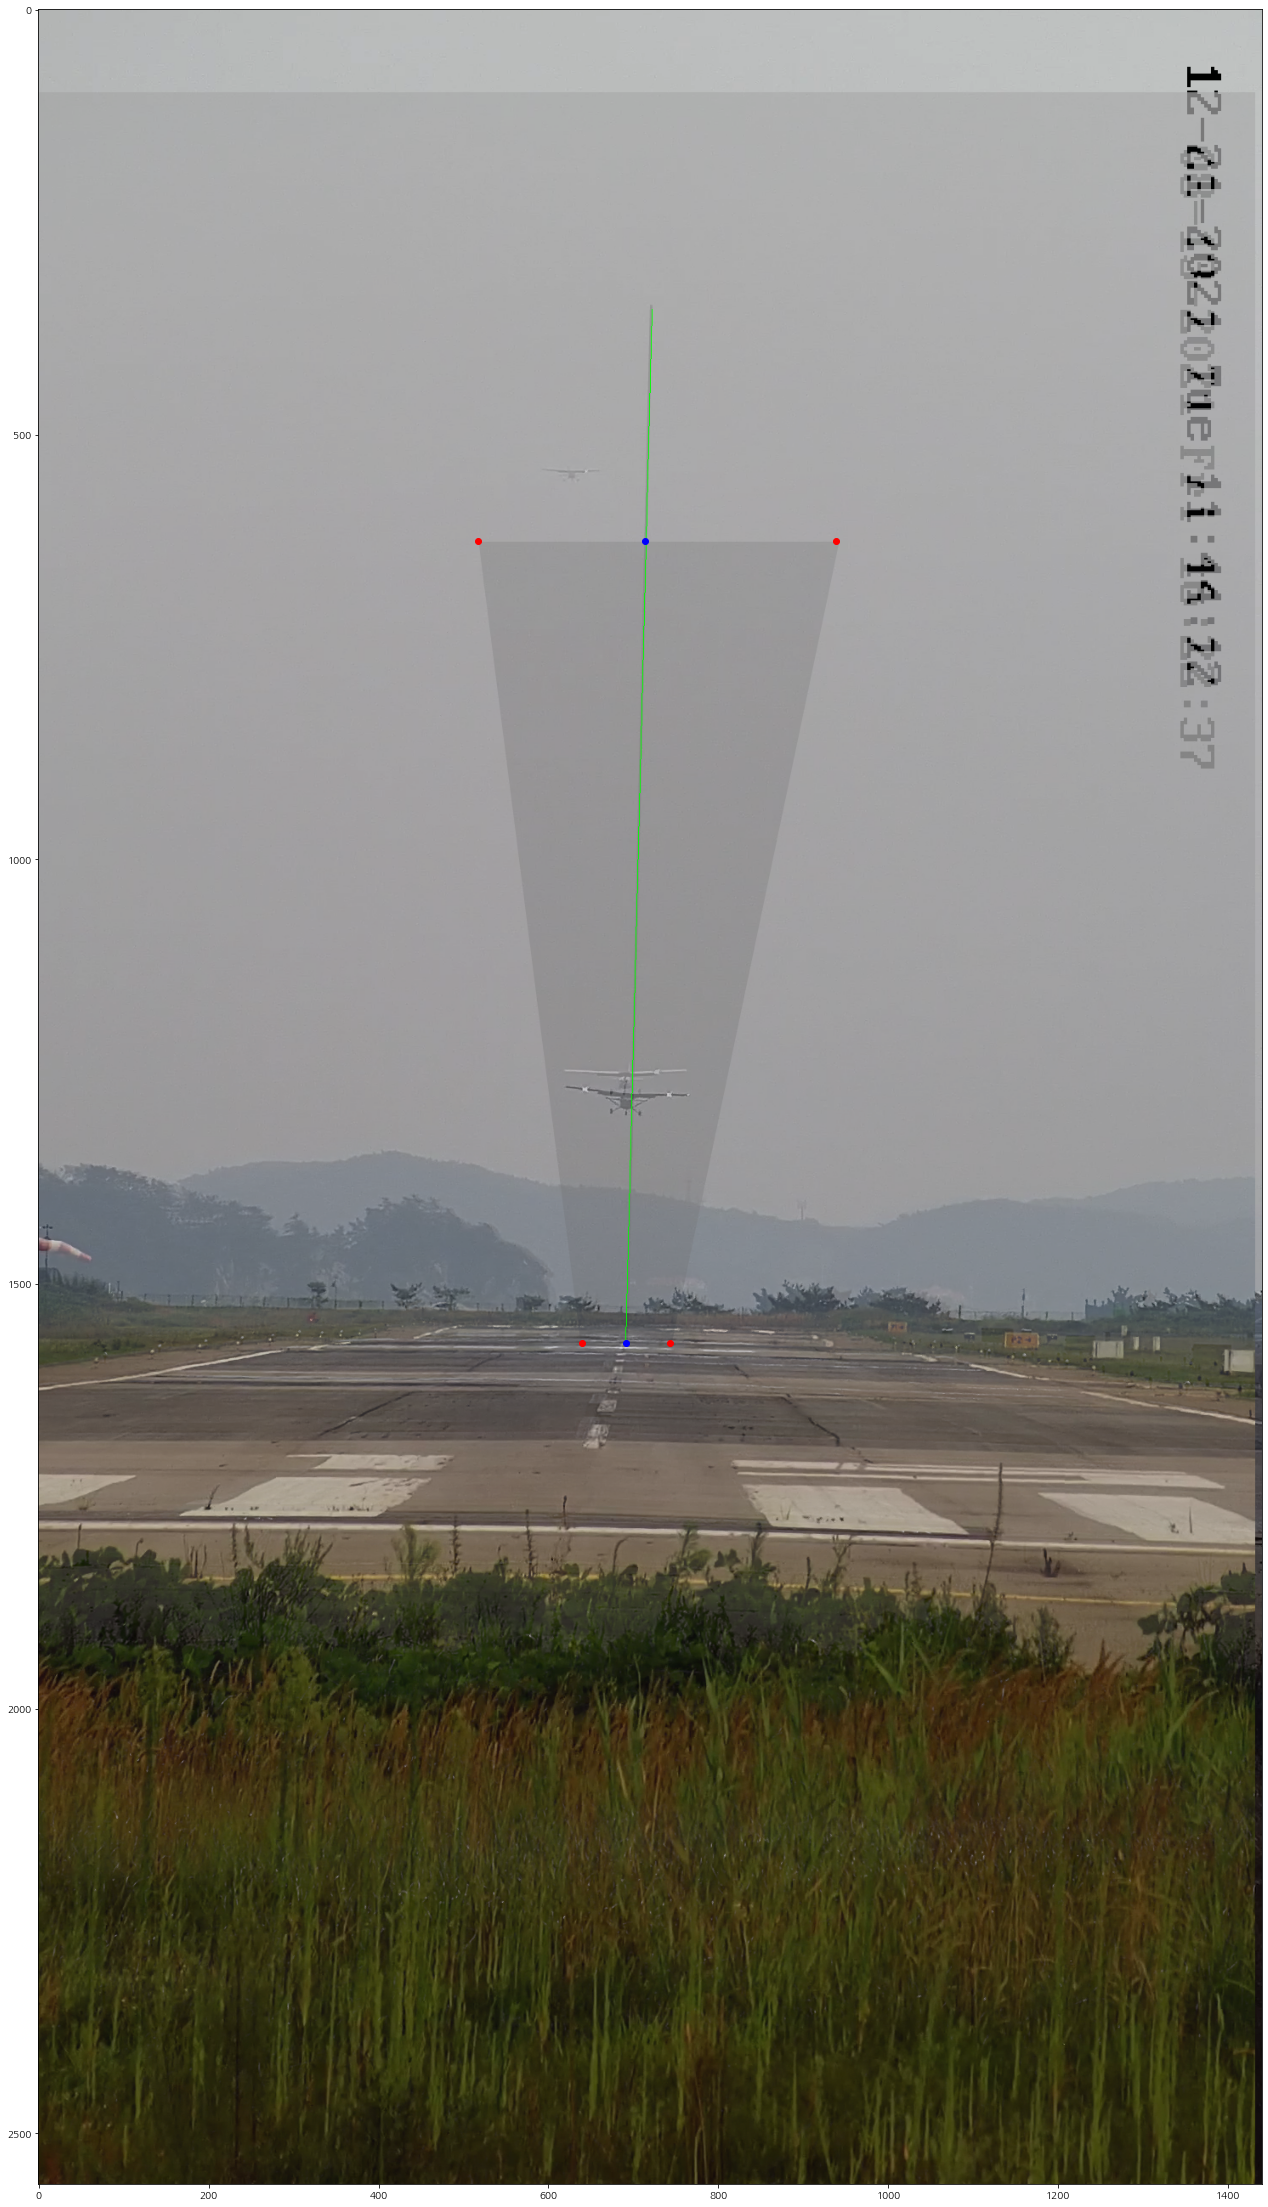

In [26]:
s = cv2.imread('211221_114331_114442.png')

start_point = (722,353)
end_point = (691,1570)
color = (0, 255, 0)
thickness = 1

s = cv2.line(s, start_point, end_point, color, thickness)
#s = cv2.line(s, (0,945), (1440,945), color, thickness)
#s = cv2.line(s, (0,1880), (1440,1880), color, thickness)
#s = cv2.line(s, (562,945), (684,1880), color, thickness)
#s = cv2.line(s, (984,945), (788,1880), color, thickness)


b, g, r = cv2.split(s)   # img파일을 b,g,r로 분리
s = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge

#cv2.imwrite('./../data/35video/good/001.png', s)


plt.figure(figsize=(30,40))


plt.scatter(517,625, c='r') #좌측 상단
plt.scatter(939,625, c='r') #우측 상단
plt.scatter(714,625, c='b')

plt.scatter(639,1570, c='r') #좌측 하단
plt.scatter(743,1570, c='r') #우측 하단
plt.scatter(691,1570, c='b')

plt.imshow(s)

In [30]:
#크로스된 지점 찾기(중심점)
def get_crosspt(x11,y11, x12,y12, x21,y21, x22,y22):

    m1 = (y12 - y11) / (x12 - x11)
    m2 = 0

    cx = (x11 * m1 - y11 - x21 * m2 + y21) / (m1 - m2)
    cy = m1 * (cx - x11) + y11

    return int(cx), int(cy)

# 중앙선 거리 계산 알고리즘
### 랜드마크 기준
[0][1] :  왼쪽 날개
[2][3] : 왼쪽 바퀴
[4][5] : 오른쪽 날개
[6][7] : 오른쪽 바퀴
[8][9] : 중심

data/crop_image/211221_114331_114442_000.jpg,0.925,605,868,697,893,[608, 873, 641, 888, 695, 875, 661, 889, 653, 880]

['605', '868', '697', '893']
722 353 691 1538 0 880 1440 880
-65.76086956521739
data/crop_image/211221_114331_114442_001.jpg,0.921,598,885,692,910,[602, 890, 634, 905, 689, 890, 656, 905, 647, 896]

['598', '885', '692', '910']
722 353 691 1538 0 896 1440 896
-70.2127659574468
data/crop_image/211221_114331_114442_002.jpg,0.932,594,900,687,927,[596, 905, 628, 923, 683, 910, 650, 924, 641, 915]

['594', '900', '687', '927']
722 353 691 1538 0 915 1440 915
-78.06451612903226
data/crop_image/211221_114331_114442_003.jpg,0.930,590,917,686,944,[592, 923, 627, 940, 683, 925, 648, 940, 640, 930]

['590', '917', '686', '944']
722 353 691 1538 0 930 1440 930
-75.625
data/crop_image/211221_114331_114442_004.jpg,0.928,590,932,686,958,[592, 938, 625, 955, 683, 940, 647, 955, 638, 945]

['590', '932', '686', '958']
722 353 691 1538 0 945 1440 945
-77.91666666666666
data/crop_image/2

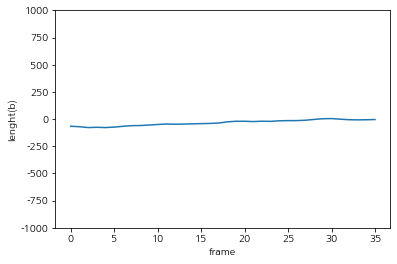

In [35]:
#중앙선 거리 계산#
import matplotlib.pyplot as plt


start_point = (int(w/2)+200,0)
end_point = (int(w/2)-200,h)



len_list=[]
out_list=[]
in_list=[]
x_list=[]
x2_list=[]
y_list=[]
path = 'data/result_image/landmark'


for i in file_list:
    j=0
    for li in list_file:
        
        l = li.split(',')

        bbox = l[2:6]
        
        lm = l[6:]
        lm[0] = lm[0].split('[')[1]
        lm[9] = lm[9].split(']')[0]
        
   
        cnt = 0
    
        if li.split(',')[0].split('/')[-1] == i.split('-')[0]:
         
            if j ==1:
                break 
            else:
                print(li)
                print(bbox)
                
                #기준선
                x11 =722
                y11 =353
                x12 =691
                y12 =1538
                
                x21 = 0
                y21 = int(lm[9])
                x22 = w
                y22 = int(lm[9])
                print(x11, y11, x12, y12, x21, y21, x22, y22)
                cx,cy = get_crosspt(x11, y11, x12, y12, x21, y21, x22, y22)

                wid = int(bbox[2])- int(bbox[0]) # bb크기 = 비행기 크기
                ratio = 11/wid #pixel ratio #세스나 날개길이 11m 
                    
                #############################################################
                x1 = 517
                y1 = 625
                x2 = 639
                y2 = 1570

                a = (y2 - y1) / (x2 - x1)
                b = y1 - (a * x1)

                y = int(lm[9])
                x = int((y - b) / a)
                    
                x_list.append(-int((cx-x)*(11/wid)*10))
                
                
                xx1 = 939
                yy1 = 625
                xx2 = 743
                yy2 = 1570

                aa = (yy2 - yy1) / (xx2 - xx1)
                bb = yy1 - (aa * xx1)

                yy = int(lm[9])
                xx = int((yy - bb) / aa)

                x2_list.append(int((xx-cx)*(11/wid)*10))
                ##############################################################
 
                j +=1
                if cx >= int(lm[8]) : 
                    #10은 차이 크게 할려고 곱함
                    ans = (abs(cx-int(lm[8])))*(11/wid)*10
                    print(-ans)
                    len_list.append(-ans)
                    
                    
                    if int(lm[8]) < x:
                        cnt = cnt + 1
                        print("이탈", cnt)              
                    out_list.append(cnt)
                    
                    
                else:
                    ans = (abs(int(lm[8])-cx))*(11/wid)*10
                    print(ans)
                    len_list.append(ans)
                
                    
                    if int(lm[8]) > xx:
                        cnt = cnt + 1
                        print("이탈", cnt)     
                    out_list.append(cnt)



                start_point = (722,353)
                end_point = (691,1570)
                color = (0, 255, 0)
                thickness = 1
                a = cv2.imread('data/crop_image/' +li.split(',')[0].split('/')[-1])
                a = cv2.line(a, start_point, end_point, color, thickness)

                b, g, r = cv2.split(a)   # img파일을 b,g,r로 분리
                a = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge


                cv2.imwrite('data/result_image/landmark/{}'.format(li.split(',')[0].split('/')[-1]),a)
                
                #cv.imwrite(savePath + "{}.png".format(aa), img)

              

print(len_list)
print(out_list)

plt.plot(len_list)


plt.xlabel('frame')
plt.ylabel('lenght(b)')
#plt.xlim([0,75])
plt.ylim([-1000,1000])

fig = plt.gcf()
plt.show()
fig.savefig(path + 'savefig_default.png')




### 이동경로 시각화

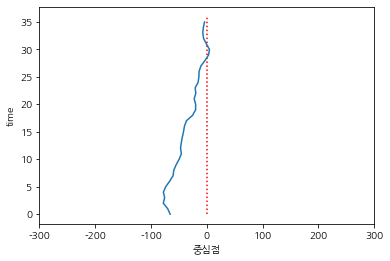

In [36]:
import matplotlib.pyplot as plt
import numpy as np


x =len_list
y =np.arange(0,len(len_list))
plt.plot([0,0],[0,len(len_list)],color='red',linestyle='dotted')


#plt.fill_betweenx(y,x_list,x2_list,color='yellow')
#plt.fill_betweenx(y,x_list,color='yellow')


plt.plot(x,y)
plt.xlabel('중심점')
plt.ylabel('time')
plt.xlim([-300,300])
#plt.ylim([len(len_list),0])

fig = plt.gcf()
plt.show()
fig.savefig(path + 'savefig_default.png')


bb1 = 732-639 
bb2 = 891-584

#cx = 759
cx = 738
x1 = 788


if cx >= x1:
    #ans = (abs(cx-x1))
    ans = (abs(cx-x1))*(11/bb2)*10
    print(-int(ans))

else:
    ans = (abs(x1-cx))*(11/bb2)*10
    #ans = (abs(x1-cx))
    print(int(ans))


# 이탈여부 CSV 파일로 저장

In [37]:
import csv

with open('이탈여부.csv','w',newline='') as f:
    fieldnames = ['num','image','distance','Y/N']
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    
    writer.writeheader()

    for i in range(len(out_list)):
        writer.writerow({'num':i,'image':file_list[i+1], 'distance':len_list[i], 'Y/N':out_list[i]})

    f.close()